In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
import string
import re

In [72]:
df = pd.read_csv('bestsellers with categories.csv')

In [73]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


### Renaming some columns and correcting punctuations

In [74]:
df.rename(columns={"User Ratings" : "User_Rating"}, inplace=True)

In [75]:
df[df['Author'] == 'J. K. Rowling']

,Name,Author,User Rating,Reviews,Price,Year,Genre
155,Harry Potter and the Goblet of Fire: The Illus...,J. K. Rowling,4.9,7758,18,2019,Fiction
159,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,2016,Fiction


In [76]:
df[df['Author'] == 'J.K. Rowling']

,Name,Author,User Rating,Reviews,Price,Year,Genre
102,Fantastic Beasts and Where to Find Them: The O...,J.K. Rowling,4.7,4370,15,2016,Fiction
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622,30,2016,Fiction
154,"Harry Potter and the Cursed Child, Parts 1 & 2...",J.K. Rowling,4.0,23973,12,2016,Fiction
156,Harry Potter and the Prisoner of Azkaban: The ...,J.K. Rowling,4.9,3146,30,2017,Fiction
157,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,4.9,10052,22,2016,Fiction
353,The Casual Vacancy,J.K. Rowling,3.3,9372,12,2012,Fiction


In [77]:
df.loc[df['Author'] == 'J. K. Rowling', 'Author'] = 'J.K. Rowling'

In [78]:
df['nameLen'] = df['Name'].apply(lambda x: len(x) - x.count(" "))

In [79]:
df['nameLen']

0      26
1      15
2      32
3      20
4      59
       ..
545    36
546    71
547    71
548    71
549    71
Name: nameLen, Length: 550, dtype: int64

In [80]:
punctuations = string.punctuation

In [81]:
print('List of punctuations: ', punctuations)

List of punctuations:  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


### Exploratory Data Analysis

In [82]:
# Dropping the duplicate values, and saving it into anther variable
noDuplicates = df.drop_duplicates('Name')

In [83]:
# Finding the different values in "Gender" feature (fiction and non-fiction)
gCount = noDuplicates['Genre'].value_counts()

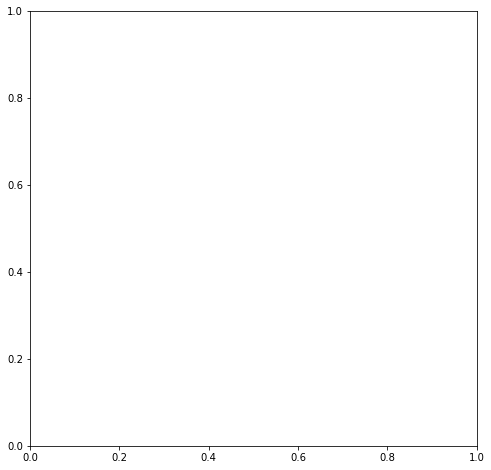

In [84]:
fig, ax = plt.subplots(figsize = (8, 8))

In [85]:
# For the color palette
genreCol = ['navy', 'crimson']

In [86]:
centerCircle = plt.Circle((0, 0), 0.7, color='white')

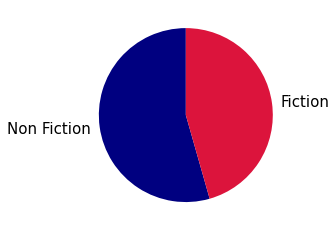

In [87]:
plt.pie(x = gCount.values,
        labels=gCount.index,
        startangle = 90,
        textprops={'size': 15},
        pctdistance=0.5,
        colors = genreCol)

ax.add_artist(centerCircle)

### As you can see, more than half books are of the genre are of the "non-fiction" category.

### -----------------------------------------------------------------------------------------------------------------------------------------------------------

### Now we will take different insights from each year

In [88]:
y1 = np.arange(2009, 2014)
y2 = np.arange(2014, 2020)

In [89]:
y1

array([2009, 2010, 2011, 2012, 2013])

In [90]:
y2

array([2014, 2015, 2016, 2017, 2018, 2019])

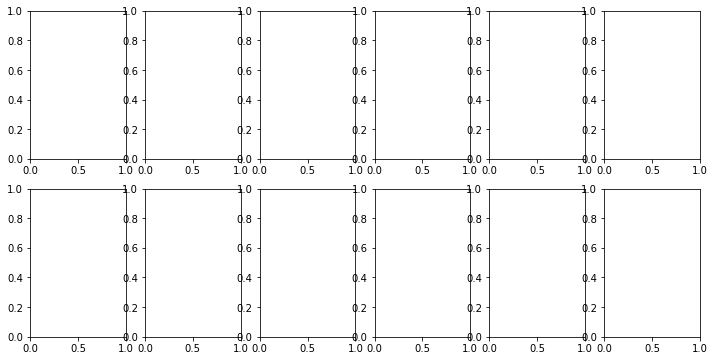

In [91]:
# Updating the fig size:
fig, ax = plt.subplots(2, 6, figsize=(12, 6))

In [92]:
ax[0, 0].pie(x = gCount.values,
            labels = None,
            autopct = '%1.1f%%',
            startangle = 90,
            textprops = {'size' : 12, 'color': 'white'},
            pctdistance = 0.5,
            colors = genreCol,
            radius = 1.1)

([<matplotlib.patches.Wedge at 0x7ff212b3c070>,
 [Text(-1.1983746141692933, -0.16732687803995513, ''),
  Text(1.1983746141692933, 0.16732687803995502, '')],
 [Text(-0.544715733713315, -0.07605767183634324, '54.4%'),
  Text(0.544715733713315, 0.07605767183634318, '45.6%')])

In [93]:
ax[0, 0].set_title('2009 - 2019\n(Overall)', color = 'darkgreen', fontdict = {'fontsize' : 15})

Text(0.5, 1.0, '2009 - 2019\n(Overall)')

In [94]:
# Enumerate: Adds a counter to a variable:
for i, year in enumerate(y1):
    counts = df[df['Year'] == year]['Genre'].value_counts()
    ax[0, i+1].set_title(year, color='darkred', fontdict = {'fontsize' : 15})
    ax[0,i+1].pie(x=counts.values, labels=None, autopct='%1.1f%%', 
                  startangle=90, textprops={'size': 12,'color': 'white'}, 
                  pctdistance=0.5, colors=genreCol, radius=1.1)

In [95]:
for i, year in enumerate(y2):
    counts = df[df['Year'] == year]['Genre'].value_counts()
    ax[1,i].pie(x=counts.values, labels=None, autopct='%1.1f%%', 
                startangle=90, textprops={'size': 12,'color': 'white'},
                pctdistance=0.5, colors=genreCol, radius=1.1)
    ax[1,i].set_title(year, color='darkred', fontdict={'fontsize': 15})

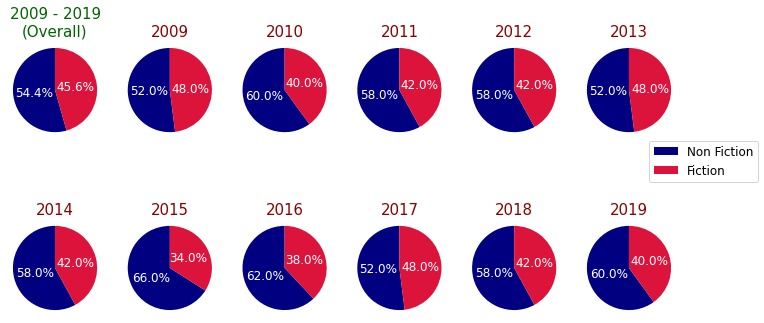

In [96]:
fig.legend(gCount.index, loc = 'center right', fontsize = 12)
fig